### 1. Load dependencies

In [1]:
import numpy as np
import warnings
import pickle
import random
import torch
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

In [2]:
# Convert tensor of images to numpy format.
def gen_out_to_numpy(tensor):
    return ((tensor * 0.5) + 0.5).squeeze(1).unsqueeze(-1).numpy()

# Adds random gaussian noise to an image.  
# Useful for data augmentation during the training phase.
class AddGaussianNoiseTransform:

    def __init__(self, mean=0.0, std=1.0):
        self.std = std
        self.mean = mean

    def __call__(self, arr):
        return (np.array(arr) + np.random.randn(*arr.shape).astype("float32") * self.std + self.mean)

    def __repr__(self):
        return self.__class__.__name__ + "(mean={0}, std={1})".format(self.mean, self.std)

In [3]:
n_samples = 20
dataset_path = 'data/omniglot/omniglot_data.npy'
generator_path = 'data/omniglot/final_omniglot_generator.pt'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

data_start_index, num_training_classes = 1420, 20
train_samples_per_class, val_samples_per_class, hel_samples_per_class = 5, 5, 5

# Load raw data and trained generator
raw_data = np.load(dataset_path)
raw_data = raw_data[data_start_index:]
dagan_generator = torch.load(generator_path, map_location=device)
dagan_generator.eval()

/var/folders/j8/gwyf8shd0zsbnc417h9b8p9w0000gn/T/ipykernel_10120/202091261.py:12: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  dagan_generator = torch.load(generator_path, 

Generator(
  (encode0): Sequential(
    (pad): _SamePad()
    (conv): Conv2d(1, 64, kernel_size=(3, 3), stride=(2, 2))
    (relu): LeakyReLU(negative_slope=0.2)
    (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
  )
  (encode1): _EncoderBlock(
    (pre_conv): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(1, 1, kernel_size=(3, 3), stride=(2, 2))
    )
    (conv0): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(65, 64, kernel_size=(3, 3), stride=(1, 1))
      (relu): LeakyReLU(negative_slope=0.2)
      (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    )
    (conv1): Sequential(
      (pad): _SamePad()
      (conv): Conv2d(128, 64, kernel_size=(3, 3), stride=(1, 1))
      (relu): LeakyReLU(negative_slope=0.2)
      (batchnorm): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
    )
    (conv2): Sequential(
      (pad): _SamePad()
      (conv):

In [4]:
raw_data[1][:5][0].shape

(28, 28, 1)

In [5]:
raw_data[1][5].max(), raw_data[1][5].min(), np.median(raw_data[1][5]), raw_data[1][5].mean()

(1.0, 0.003921569, 1.0, 0.92763615)

In [6]:
pre_train_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5)),
    ]
)

val_transform = transforms.Compose(
    [
        transforms.ToPILImage(),
        # transforms.Resize(224),
        # transforms.ToTensor(),
        # transforms.Normalize((0.5), (0.5)),
    ]
)

train_transform = transforms.Compose(
    [
        # AddGaussianNoiseTransform(0, 0.1),
        # transforms.ToPILImage(),
        # transforms.RandomHorizontalFlip(),
        # transforms.Resize(224),
        # transforms.ToTensor(),
        transforms.Normalize((0.5), (0.5)),
    ]
)

 
 
i_sample 1
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


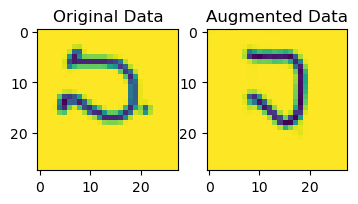

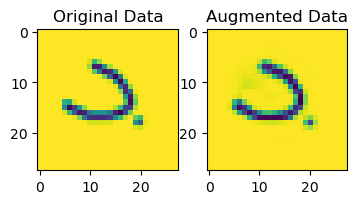

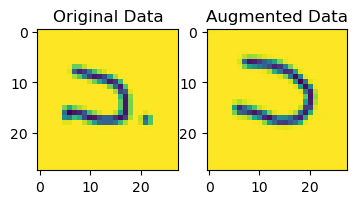

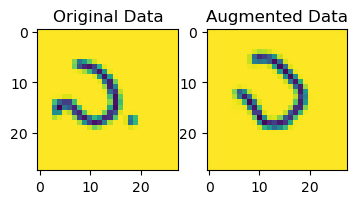

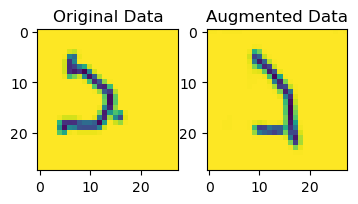

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 2
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


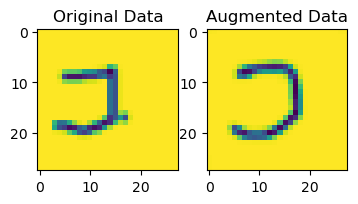

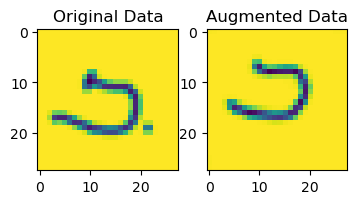

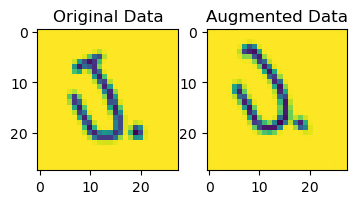

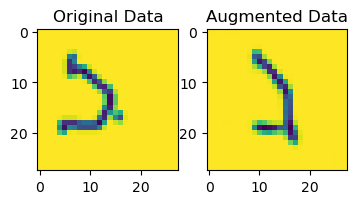

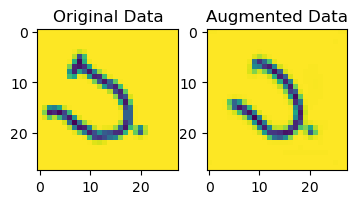

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 3
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


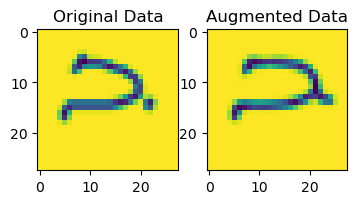

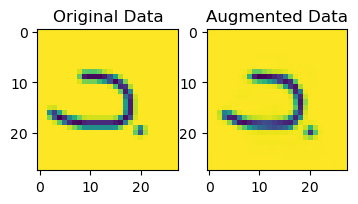

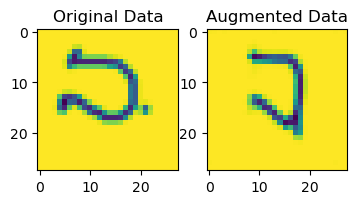

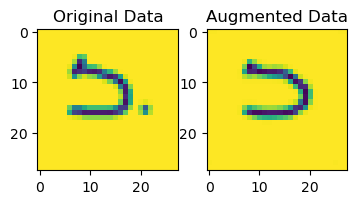

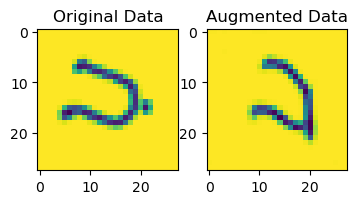

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 4
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


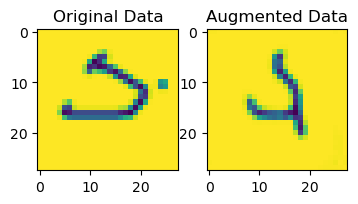

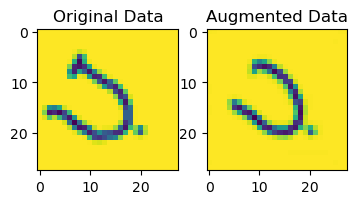

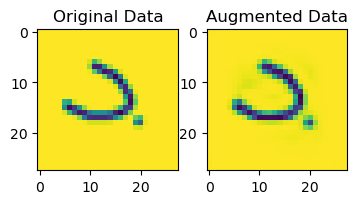

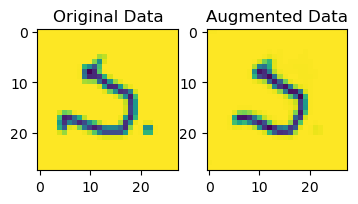

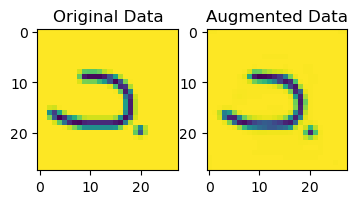

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 5
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


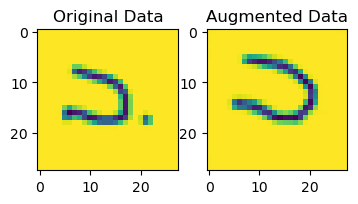

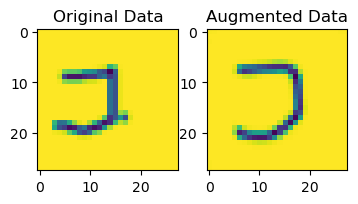

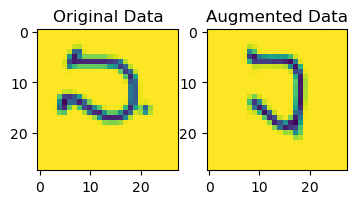

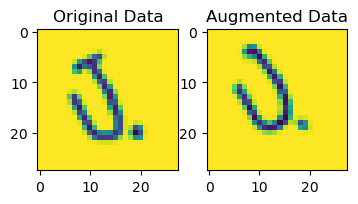

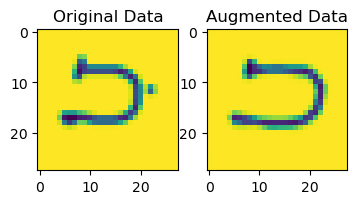

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 6
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


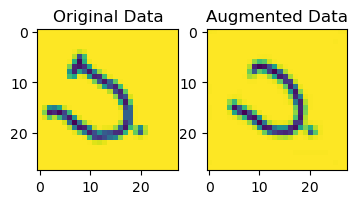

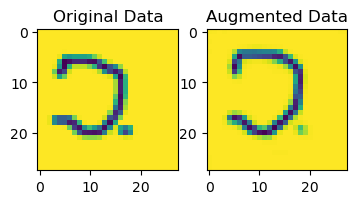

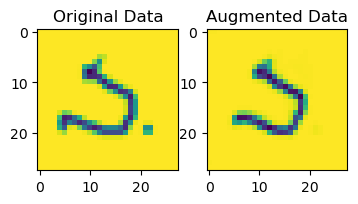

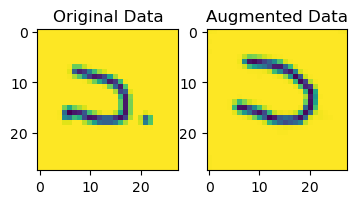

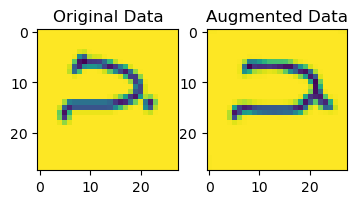

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 7
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


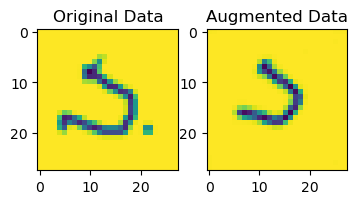

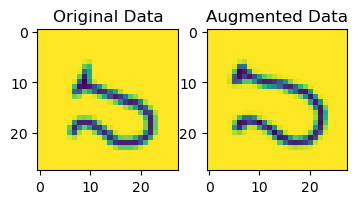

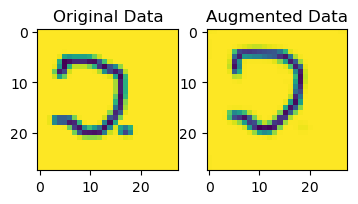

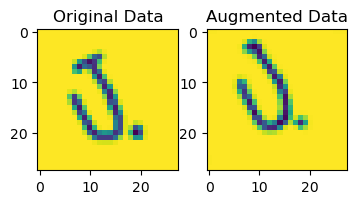

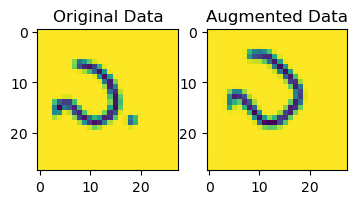

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 8
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


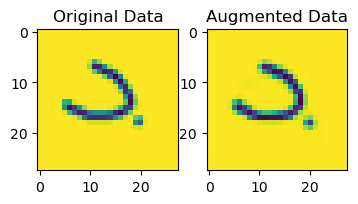

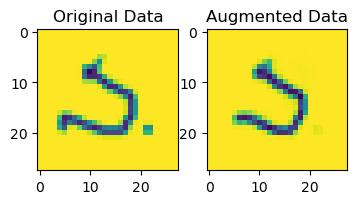

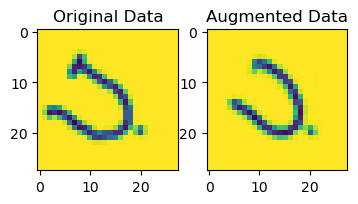

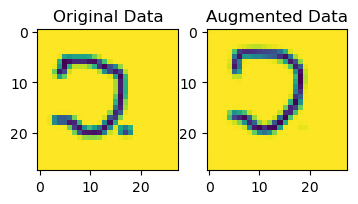

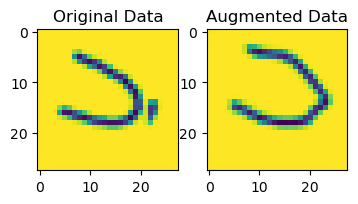

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 9
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


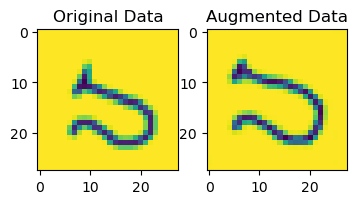

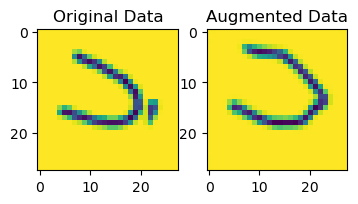

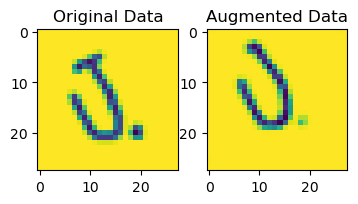

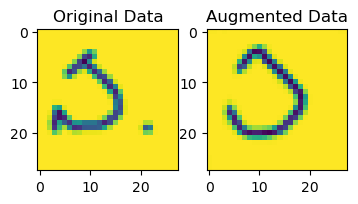

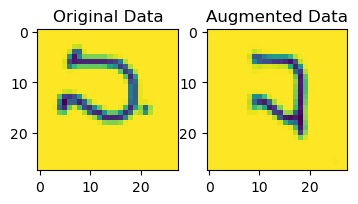

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 10
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


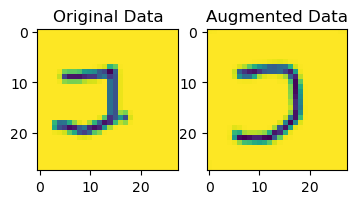

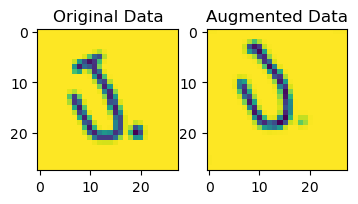

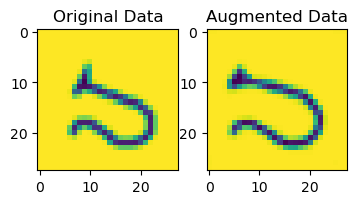

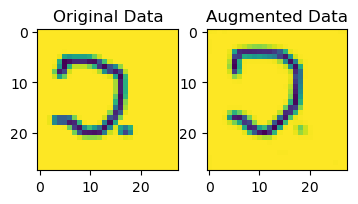

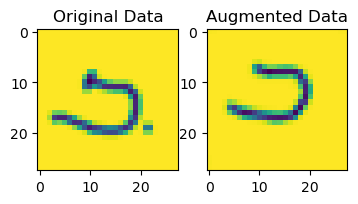

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 11
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


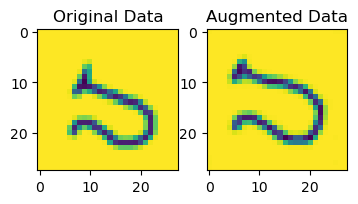

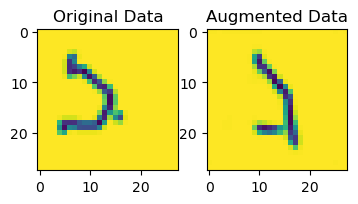

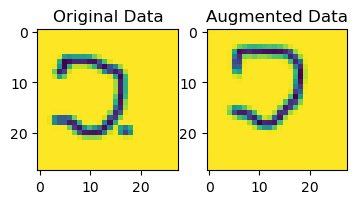

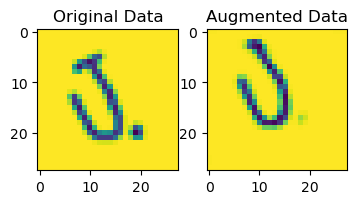

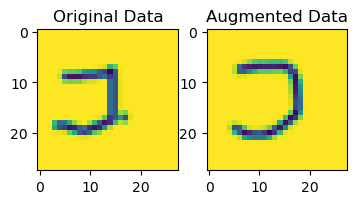

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 12
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


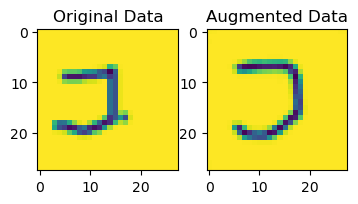

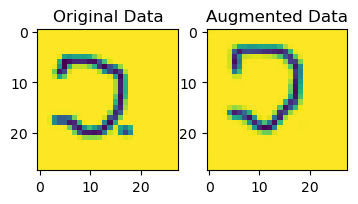

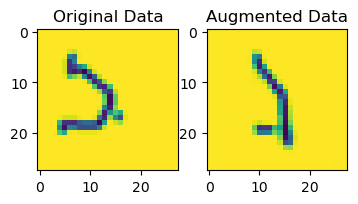

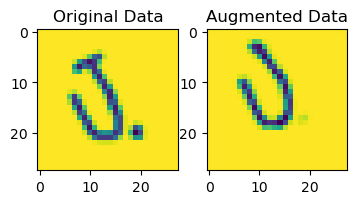

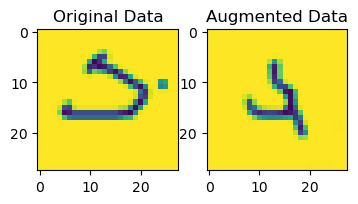

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 13
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


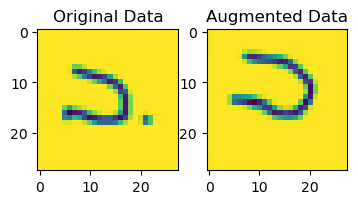

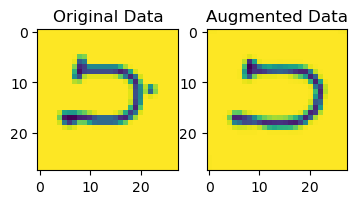

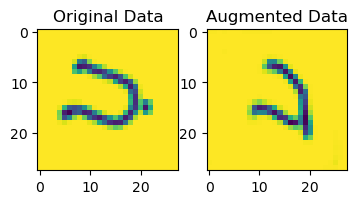

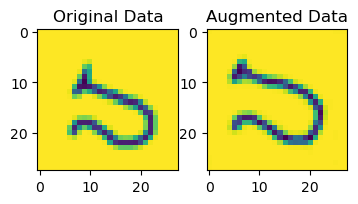

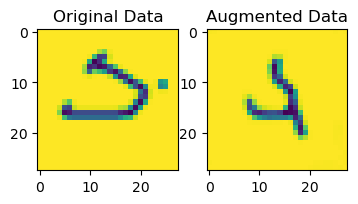

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 14
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


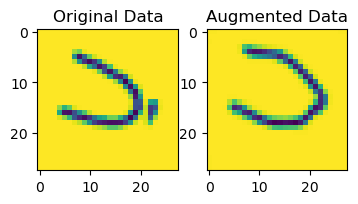

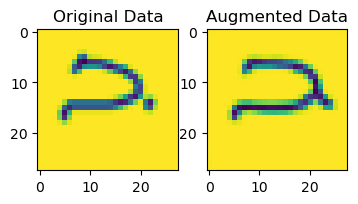

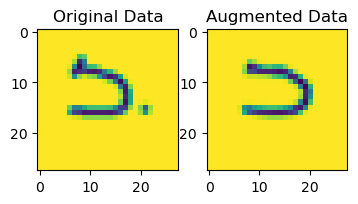

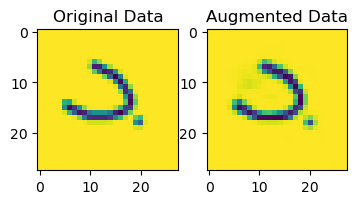

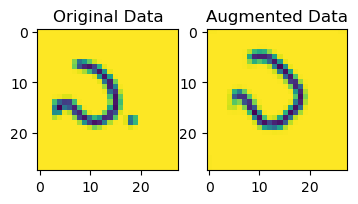

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 15
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


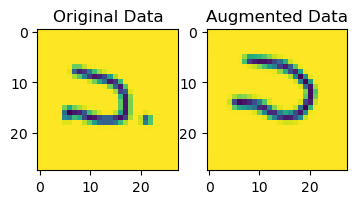

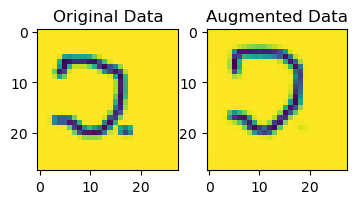

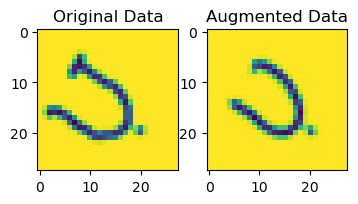

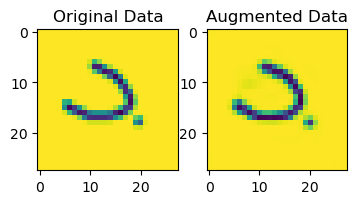

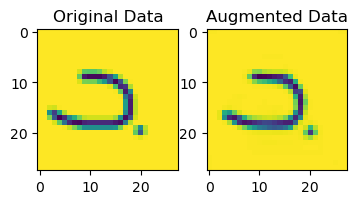

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 16
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


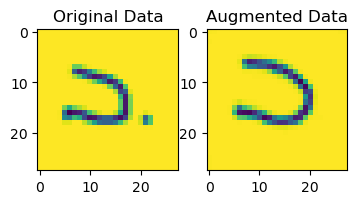

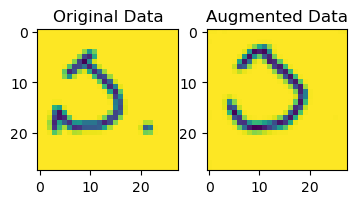

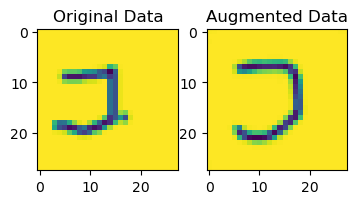

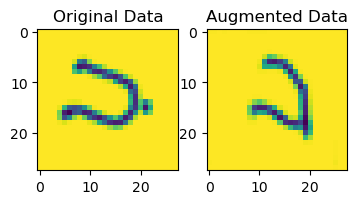

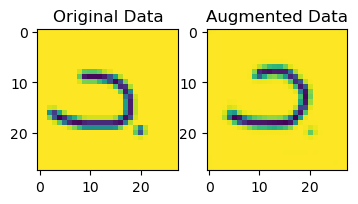

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 17
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


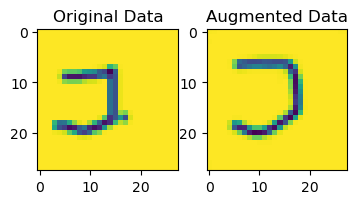

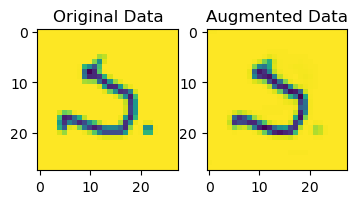

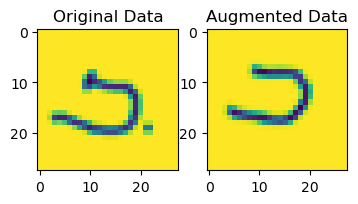

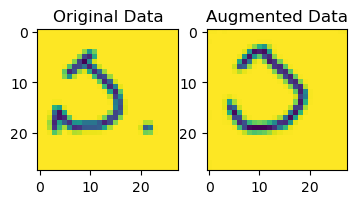

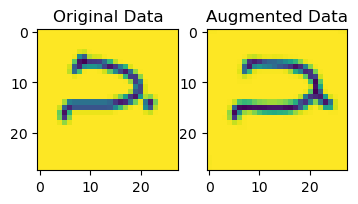

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 18
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


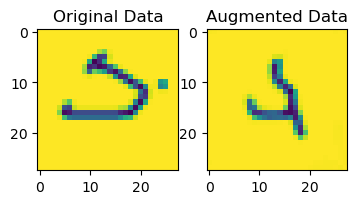

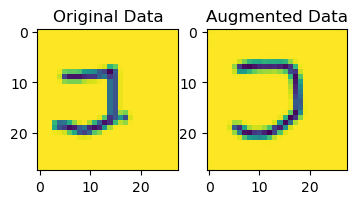

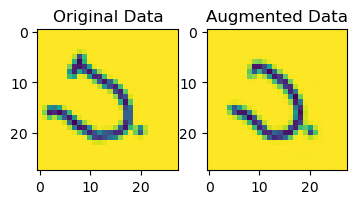

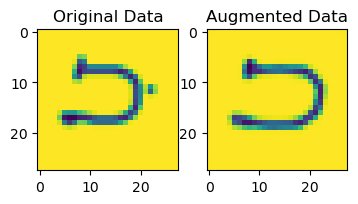

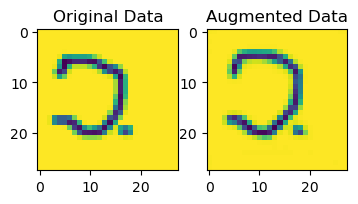

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 19
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


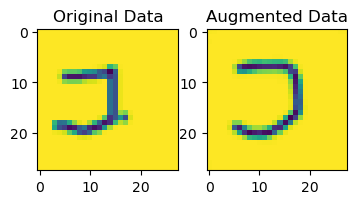

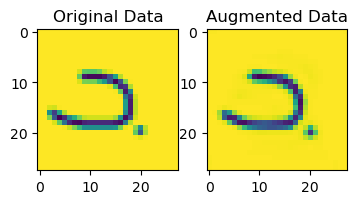

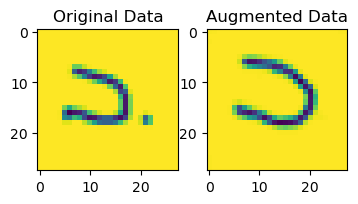

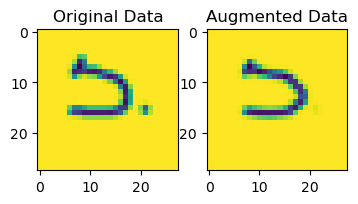

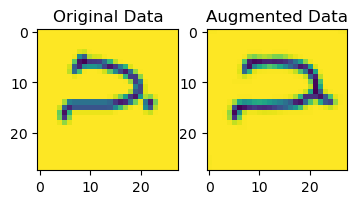

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)
 
 
i_sample 20
original_X.shape (100, 28, 28, 1) type(original_X) <class 'numpy.ndarray'>
val_X.shape (100, 28, 28, 1) type(val_X) <class 'numpy.ndarray'>
heldout_X.shape (100, 28, 28, 1) type(heldout_X) <class 'numpy.ndarray'>
X.shape (200, 28, 28, 1)


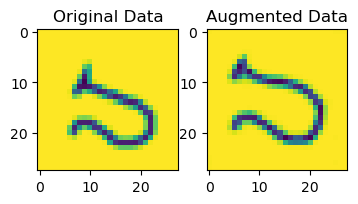

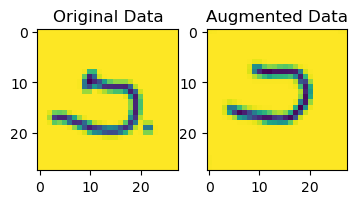

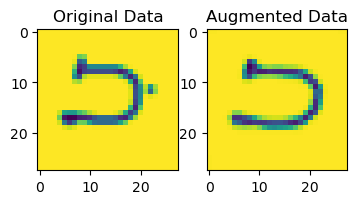

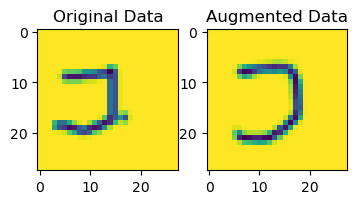

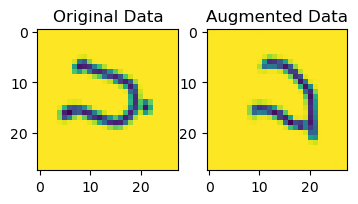

original_X.shape (100, 784) augmented_X.shape (100, 784) X.shape (200, 784) val_X.shape (100, 784) heldout_X.shape (100, 784)
original_y.shape (100,) augmented_y.shape (100,) y.shape (200,) val_y.shape (100,) heldout_y.shape (100,)


In [7]:
# Set seeds for reproducibility

for i_sample in range(n_samples):
    
    print(' ')
    print(' ')
    print('i_sample', i_sample + 1)
    
    seed = i_sample
    np.random.seed(seed)  # Set seed for NumPy
    random.seed(seed)     # Set seed for random module
    torch.manual_seed(seed)  # Set seed for PyTorch
    torch.cuda.manual_seed(seed)  # Set seed for PyTorch CUDA (if using GPU)
    torch.backends.cudnn.deterministic = True  # Ensure CUDNN determinism
    torch.backends.cudnn.benchmark = False  # Disable CUDNN benchmarking for reproducibility

    train_X, train_y, val_X, val_y, heldout_X, heldout_y = [], [], [], [], [], []
    
    for i in range(num_training_classes):
        class_data = list(raw_data[i])
        
        # Shuffle data so different examples are chosen under different seeds
        np.random.shuffle(class_data)
        
        train_X.extend([pre_train_transform(i) for i in class_data[:train_samples_per_class]])
        train_y.extend([i] * train_samples_per_class)

        val_X.extend([pre_train_transform(i) for i in class_data[train_samples_per_class:(train_samples_per_class + val_samples_per_class)]])
        val_y.extend([i] * val_samples_per_class)
        
        heldout_X.extend([pre_train_transform(i) for i in class_data[-hel_samples_per_class:]])
        heldout_y.extend([i] * hel_samples_per_class)
        
    train_X = torch.stack(train_X, dim=0)
    original_X = gen_out_to_numpy(train_X) # Original data
    
    val_X = torch.stack(val_X, dim=0)
    val_X = gen_out_to_numpy(val_X)
    
    heldout_X = torch.stack(heldout_X, dim=0)
    heldout_X = gen_out_to_numpy(heldout_X)
    
    print('original_X.shape', original_X.shape, 'type(original_X)', type(original_X))
    print('val_X.shape', val_X.shape, 'type(val_X)', type(val_X))
    print('heldout_X.shape', heldout_X.shape, 'type(heldout_X)', type(heldout_X))

    # Data augmentation
    z = torch.randn((train_X.shape[0], dagan_generator.z_dim))
    with torch.no_grad():
        g_out = dagan_generator(train_X.to(device), z.to(device)).cpu()
    augmented_X = gen_out_to_numpy(g_out)

    X = np.concatenate((original_X, augmented_X), axis=0)
    print('X.shape', X.shape)
    
    # Visualization
    n_vis = 5
    original_X_vis = original_X[:n_vis]
    augmented_X_vis = augmented_X[:n_vis]
    for i in range(n_vis):
        ori_img = original_X_vis[i]
        aug_img = augmented_X_vis[i]

        f, ax = plt.subplots(1, 2, figsize=(4, 2))
        ax[0].imshow(ori_img)
        ax[0].set_title('Original Data')  # Set title for the first image
        ax[1].imshow(aug_img)
        ax[1].set_title('Augmented Data')  # Set title for the second image
        plt.show()
    
    # Resize and Store preprocessed data
    original_X = original_X.reshape(original_X.shape[0], -1)
    augmented_X = augmented_X.reshape(augmented_X.shape[0], -1)
    X = X.reshape(X.shape[0], -1)
    val_X = val_X.reshape(val_X.shape[0], -1)
    heldout_X = heldout_X.reshape(heldout_X.shape[0], -1)
    
    original_y = np.asarray(train_y)
    augmented_y = original_y.copy()
    y = np.concatenate((original_y, augmented_y), axis=0)
    val_y = np.asarray(val_y)
    heldout_y = np.asarray(heldout_y)

    num_trn = len(original_X)
    num_val = len(val_X)
    num_heldout = len(heldout_X)
    n_augs = 1

    print('original_X.shape', original_X.shape, 'augmented_X.shape', augmented_X.shape, 'X.shape', X.shape,
           'val_X.shape', val_X.shape, 'heldout_X.shape', heldout_X.shape)
    
    print('original_y.shape', original_y.shape, 'augmented_y.shape', augmented_y.shape, 'y.shape', y.shape,
           'val_y.shape', val_y.shape, 'heldout_y.shape', heldout_y.shape)


    mydict = {'X_ori': original_X, 'X_aug': augmented_X, 'X_ori_aug': X, 'X_val': val_X, 'X_heldout': heldout_X,
              'y_ori': original_y, 'y_aug': augmented_y, 'y_ori_aug': y, 'y_val': val_y, 'y_heldout': heldout_y}

    with open("data/omniglot/Augmented_sample{}_num_classes={}_num_trn={}_num_val={}_num_heldout={}_n_augs={}.pickle".format(
            i_sample+1, num_training_classes, num_trn, num_val, num_heldout, n_augs), "wb") as fp:
        pickle.dump(mydict, fp)


In [8]:
# Test performance of the KNN Classifier

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import accuracy_score

K = 3

for i_sample in range(n_samples):
    
    print(' ')
    print('Testing the performance of {}th sample...'.format(i_sample+1))
    
    with open("data/omniglot/Augmented_sample{}_num_classes={}_num_trn={}_num_val={}_num_heldout={}_n_augs={}.pickle".format(
            i_sample+1, num_training_classes, num_trn, num_val, num_heldout, n_augs), "rb") as fp:
        mydict = pickle.load(fp)
    
    X_ori = mydict['X_ori']
    y_ori = mydict['y_ori']
    X_aug = mydict['X_aug']
    y_aug = mydict['y_aug']
    X_ori_aug = mydict['X_ori_aug']
    y_ori_aug = mydict['y_ori_aug']
    X_val = mydict['X_val']
    y_val = mydict['y_val']
    
    model_ori = KNN(n_neighbors=K, weights='uniform')
    model_ori.fit(X_ori, y_ori)
    preds = model_ori.predict(X_val)
    print('Classification accuracy for original dataset:', accuracy_score(y_val, preds))

    model_aug = KNN(n_neighbors=K, weights='uniform')
    model_aug.fit(X_aug, y_aug)
    preds = model_aug.predict(X_val)
    print('Classification accuracy for augmented dataset:', accuracy_score(y_val, preds))

    model_ori_aug = KNN(n_neighbors=K, weights='uniform')
    model_ori_aug.fit(X_ori_aug, y_ori_aug)
    preds = model_ori_aug.predict(X_val)
    print('Classification accuracy for original and augmented dataset:', accuracy_score(y_val, preds))

 
Testing the performance of 1th sample...
Classification accuracy for original dataset: 0.47
Classification accuracy for augmented dataset: 0.38
Classification accuracy for original and augmented dataset: 0.52
 
Testing the performance of 2th sample...
Classification accuracy for original dataset: 0.44
Classification accuracy for augmented dataset: 0.4
Classification accuracy for original and augmented dataset: 0.48
 
Testing the performance of 3th sample...
Classification accuracy for original dataset: 0.39
Classification accuracy for augmented dataset: 0.34
Classification accuracy for original and augmented dataset: 0.51
 
Testing the performance of 4th sample...
Classification accuracy for original dataset: 0.5
Classification accuracy for augmented dataset: 0.46
Classification accuracy for original and augmented dataset: 0.62
 
Testing the performance of 5th sample...
Classification accuracy for original dataset: 0.41
Classification accuracy for augmented dataset: 0.39
Classificati

In [10]:
# Test performance of the DecisionTree Classifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i_sample in range(n_samples):
    
    print(' ')
    print('Testing the performance of {}th sample...'.format(i_sample+1))
    
    with open("data/omniglot/Augmented_sample{}_num_classes={}_num_trn={}_num_val={}_num_heldout={}_n_augs={}.pickle".format(
            i_sample+1, num_training_classes, num_trn, num_val, num_heldout, n_augs), "rb") as fp:
        mydict = pickle.load(fp)
    
    X_ori = mydict['X_ori']
    y_ori = mydict['y_ori']
    X_aug = mydict['X_aug']
    y_aug = mydict['y_aug']
    X_ori_aug = mydict['X_ori_aug']
    y_ori_aug = mydict['y_ori_aug']
    X_val = mydict['X_val']
    y_val = mydict['y_val']
    
    model_ori = DecisionTreeClassifier(random_state=666)
    model_ori.fit(X_ori, y_ori)
    preds = model_ori.predict(X_val)
    print('Classification accuracy for original dataset:', accuracy_score(y_val, preds))

    model_aug = DecisionTreeClassifier(random_state=666)
    model_aug.fit(X_aug, y_aug)
    preds = model_aug.predict(X_val)
    print('Classification accuracy for augmented dataset:', accuracy_score(y_val, preds))

    model_ori_aug = DecisionTreeClassifier(random_state=666)
    model_ori_aug.fit(X_ori_aug, y_ori_aug)
    preds = model_ori_aug.predict(X_val)
    print('Classification accuracy for original and augmented dataset:', accuracy_score(y_val, preds))

 
Testing the performance of 1th sample...
Classification accuracy for original dataset: 0.22
Classification accuracy for augmented dataset: 0.11
Classification accuracy for original and augmented dataset: 0.38
 
Testing the performance of 2th sample...
Classification accuracy for original dataset: 0.39
Classification accuracy for augmented dataset: 0.17
Classification accuracy for original and augmented dataset: 0.37
 
Testing the performance of 3th sample...
Classification accuracy for original dataset: 0.26
Classification accuracy for augmented dataset: 0.16
Classification accuracy for original and augmented dataset: 0.27
 
Testing the performance of 4th sample...
Classification accuracy for original dataset: 0.39
Classification accuracy for augmented dataset: 0.17
Classification accuracy for original and augmented dataset: 0.43
 
Testing the performance of 5th sample...
Classification accuracy for original dataset: 0.17
Classification accuracy for augmented dataset: 0.12
Classifica

In [11]:
# Test performance of the LogisticRegression Classifier
import time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for i_sample in range(n_samples):
    
    print(' ')
    print('Testing the performance of {}th sample...'.format(i_sample+1))
    
    with open("data/omniglot/Augmented_sample{}_num_classes={}_num_trn={}_num_val={}_num_heldout={}_n_augs={}.pickle".format(
            i_sample+1, num_training_classes, num_trn, num_val, num_heldout, n_augs), "rb") as fp:
        mydict = pickle.load(fp)
    
    X_ori = mydict['X_ori']
    y_ori = mydict['y_ori']
    X_aug = mydict['X_aug']
    y_aug = mydict['y_aug']
    X_ori_aug = mydict['X_ori_aug']
    y_ori_aug = mydict['y_ori_aug']
    X_val = mydict['X_val']
    y_val = mydict['y_val']
    
    start = time.time()
    model_ori = LogisticRegression(max_iter=5000, solver='liblinear', random_state=666)
    model_ori.fit(X_ori, y_ori)
    preds = model_ori.predict(X_val)
    end = time.time()
    print('Classification accuracy for original dataset:', accuracy_score(y_val, preds))
    print('time:', end-start)
          
    model_aug = LogisticRegression(max_iter=5000, solver='liblinear', random_state=666)
    model_aug.fit(X_aug, y_aug)
    preds = model_aug.predict(X_val)
    print('Classification accuracy for augmented dataset:', accuracy_score(y_val, preds))

    model_ori_aug = LogisticRegression(max_iter=5000, solver='liblinear', random_state=666)
    model_ori_aug.fit(X_ori_aug, y_ori_aug)
    preds = model_ori_aug.predict(X_val)
    print('Classification accuracy for original and augmented dataset:', accuracy_score(y_val, preds))

 
Testing the performance of 1th sample...
Classification accuracy for original dataset: 0.67
time: 0.09308910369873047
Classification accuracy for augmented dataset: 0.49
Classification accuracy for original and augmented dataset: 0.68
 
Testing the performance of 2th sample...
Classification accuracy for original dataset: 0.66
time: 0.11747479438781738
Classification accuracy for augmented dataset: 0.55
Classification accuracy for original and augmented dataset: 0.67
 
Testing the performance of 3th sample...
Classification accuracy for original dataset: 0.61
time: 0.1109018325805664
Classification accuracy for augmented dataset: 0.5
Classification accuracy for original and augmented dataset: 0.65
 
Testing the performance of 4th sample...
Classification accuracy for original dataset: 0.66
time: 0.11849093437194824
Classification accuracy for augmented dataset: 0.65
Classification accuracy for original and augmented dataset: 0.72
 
Testing the performance of 5th sample...
Classificat